# Problem Statement :

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here we will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

# Aim :

__To build a machine learning model to predict the price of the flight ticket.__

Given :
        
        Size of training set: 10683 records

        Size of test set: 2671 records

In [1]:
# Importing the first required libraries

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

And rest of the libraries will be imported according to our requirements as we proceed further into the project

__Datasets :__
In this project we are provided 2 separate datasets, one for training purpose and one for testing purpose.

In [2]:
# Getting the datasets

trainset=pd.read_excel("Flight_Train.xlsx")
testset=pd.read_excel("Flight_Test.xlsx")

In [3]:
trainset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
testset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


Now let's understand the various features of this dataset :

__Airline:__ The name of the airline.

__Date_of_Journey:__ The date of the journey

__Source:__ The source from which the service begins.

__Destination:__ The destination where the service ends.

__Route:__ The route taken by the flight to reach the destination.

__Dep_Time:__ The time when the journey starts from the source.

__Arrival_Time:__ Time of arrival at the destination.

__Duration:__ Total duration of the flight.

__Total_Stops:__ Total stops between the source and destination.

__Additional_Info:__ Additional information about the flight

__Price:__ The price of the ticket

# Exploratory Data Analysis for Train Dataset :

In [5]:
# Checking the features of the train dataset

trainset.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [6]:
# Checking shape of the train dataset

trainset.shape

(10683, 11)

___The train dataset has 10683 rows and 11 columns.___

In [7]:
# Checking datatype of the train dataset

trainset.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

___So, all the features are object datatype, except for the 'Price' is int datatype.___

In [8]:
# Getting more information about the dataset

trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


_Here we can observe that all the 10683 rows, for all the columns, are non null, that is there are no null values._

_And memory used by the dataset is 918.2+ KB._

In [9]:
# Checking for null values in train dataset

trainset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

___There are only 2 null values in the train dataset, so it can be dropped easily.___

In [10]:
trainset.dropna(inplace=True)

In [11]:
# Shape of train dataset after dropping null values :-

trainset.shape

(10682, 11)

In [12]:
trainset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

___Successfully dropped the null values.___

We can also visualize and check :

In [13]:
# First importing the seaborn library

import seaborn as sns

<AxesSubplot:>

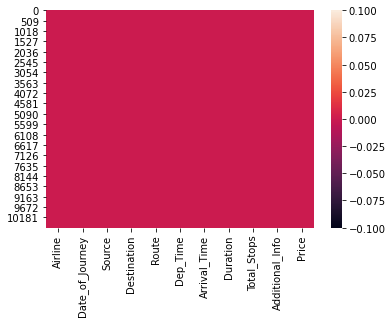

In [14]:
sns.heatmap(trainset.isnull())

___From the above heatmap visualization we can observe that there are no white spaces, hence no null values.___

In [15]:
trainset.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

We have some categorical data here, lets check their value counts :

In [16]:
trainset.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

Here we can observe the total count for each airline.

In [17]:
trainset.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

These are the most popular source locations for passengers.

In [18]:
trainset.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

These are the popular destinations passengers are travelling to. But there are repeated values for 'Delhi' and 'New Delhi', which are basically the same locations. Hence it can be replaced with one feature.

In [19]:
trainset["Destination"]=trainset["Destination"].replace({'New Delhi': 'Delhi'})

In [20]:
trainset.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

_Successfully replaced._

In [21]:
# Same needs to be done for the test dataset :

testset.Destination.value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [22]:
testset["Destination"]=testset["Destination"].replace({'New Delhi': 'Delhi'})

In [23]:
testset.Destination.value_counts()

Cochin       1145
Banglore      710
Delhi         555
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

_Successfully replaced for test dataset too._

In [24]:
trainset.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

Passengers mostly prefer the 1 stopage route.

In [25]:
trainset.Duration.value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
35h 20m      1
5m           1
30h 10m      1
47h          1
27h 55m      1
Name: Duration, Length: 368, dtype: int64

In [26]:
trainset.Additional_Info.value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

Here also we have repeated values for 'No info'.

In [27]:
trainset["Additional_Info"]=trainset["Additional_Info"].replace({'No Info': 'No info'})

In [28]:
trainset.Additional_Info.value_counts()

No info                         8347
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

_Successfully replaced._

# Feature Engineering :

In the dataset we can observe columns such as __"Date_of_Journey", "Route", "Dep_Time", "Arrival_Time",	"Duration"__ are not in a proper format which can be used for analysis and machine learning models. 

Therefore we need to convert them into timestamps using __datetime__ library for proper analysis and prediction.

In [29]:
trainset.Date_of_Journey

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10682, dtype: object

From "Date_of_Journey", we will extract only the date and month. This data is specifically for the year 2019 only, so no need to extract year.

In [30]:
# To extract the day of journey

trainset['Journey_Day']= pd.to_datetime(trainset.Date_of_Journey, format="%d/%m/%Y").dt.day

In [31]:
# To extract the month of journey

trainset['Journey_Month']= pd.to_datetime(trainset.Date_of_Journey, format="%d/%m/%Y").dt.month

In [32]:
trainset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


___Separate columns for day and month of journey are added to the train dataset.___

Hence, "Date_of_Journey" can be dropped.

In [33]:
trainset.drop(['Date_of_Journey'],axis=1,inplace=True)

In [34]:
trainset.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3


_Successfully dropped._

__Now similarly, we can extract values from "Dep_Time"__

In [35]:
trainset.Dep_Time

0        22:20
1        05:50
2        09:25
3        18:05
4        16:50
         ...  
10678    19:55
10679    20:45
10680    08:20
10681    11:30
10682    10:55
Name: Dep_Time, Length: 10682, dtype: object

In [36]:
# To extract the hour value

trainset['Dep_Hour']= pd.to_datetime(trainset.Dep_Time).dt.hour

In [37]:
# To extract the minute value

trainset['Dep_Min']= pd.to_datetime(trainset.Dep_Time).dt.minute

In [38]:
trainset.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


_Separate columns for hour and minute of departure are added to the train dataset._

Hence, "Dep_Time" can be dropped.

In [39]:
trainset.drop(['Dep_Time'],axis=1,inplace=True)

In [40]:
trainset.head(1)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min
0,IndiGo,Banglore,Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20


_Successfully dropped._

__Now similarly, we can extract values from "Arrival_Time"__

In [41]:
trainset.Arrival_Time

0        01:10 22 Mar
1               13:15
2        04:25 10 Jun
3               23:30
4               21:35
             ...     
10678           22:25
10679           23:20
10680           11:20
10681           14:10
10682           19:15
Name: Arrival_Time, Length: 10682, dtype: object

In [42]:
# To extract the hour value

trainset['Arrival_Hour']= pd.to_datetime(trainset.Arrival_Time).dt.hour

In [43]:
# To extract the minute value

trainset['Arrival_Min']= pd.to_datetime(trainset.Arrival_Time).dt.minute

In [44]:
trainset.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


_2 Separate columns for hour and minute of arrival are added to the train dataset._

Hence, "Arrival_Time" can be dropped.

In [45]:
trainset.drop(['Arrival_Time'],axis=1,inplace=True)

In [46]:
trainset.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10


_Successfully dropped._

__Now we have to extract values from "Duration".__

In [47]:
# First assigning Duration column values into a list :

duration=list(trainset['Duration'])

In [48]:
duration = list(trainset["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0])) # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) 
    # Extracts minutes from duration

In [49]:
trainset["Duration_hours"] = duration_hours
trainset["Duration_mins"] = duration_mins

In [50]:
trainset.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


_2 Separate columns for hour and minute of duration are added to the train dataset._

Hence, "Duration" can be dropped.

In [51]:
trainset.drop(['Duration'],axis=1,inplace=True)

In [52]:
trainset.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50


_Successfully dropped._

__Handling "Total_Stops" column :__

In [53]:
trainset.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

Here we can observe 4 uniques values : non-stop, 1 stop, 2 stops, 3 stops, 4 stops.
    
We can replace these values with single digits for easy analysis, because while using label  encoder to convert them, it might assign random values.

In [54]:
trainset.Total_Stops.replace(['non-stop', '1 stop', '2 stops', '3 stops', '4 stops'],[0,1,2,3,4],inplace=True)

In [55]:
trainset.Total_Stops.value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

_Successfully replaced._

# Handling Categorical Data :

We have 3 categorical features to handle :
    
    1. Airline
    2. Source
    3. Destination

__"Airline" :__

In [56]:
trainset.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

Here we can observe repeated values for some airlines, which are Jet Airways, Multiple carriers, and Vistara. Hence these can be replaced with one airline only.

In [57]:
trainset["Airline"]=trainset["Airline"].replace({'Jet Airways Business': 'Jet Airways'})
trainset["Airline"]=trainset["Airline"].replace({'Multiple carriers Premium economy': 'Multiple carriers'})
trainset["Airline"]=trainset["Airline"].replace({'Vistara Premium economy': 'Vistara'})

In [58]:
trainset.Airline.value_counts()

Jet Airways          3855
IndiGo               2053
Air India            1751
Multiple carriers    1209
SpiceJet              818
Vistara               482
Air Asia              319
GoAir                 194
Trujet                  1
Name: Airline, dtype: int64

_Successfully replaced._

Here Airline is nominal data, that is, data is not in any specific order, hence we use OneHotEncoder.

In [59]:
Airline=trainset['Airline']

In [60]:
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,SpiceJet,Trujet,Vistara
0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


And we obtained separate columns for all the airlines.

__"Source" :__

In [61]:
trainset.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [62]:
Source=trainset['Source']
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


And we obtained separate columns for all the source places.

__"Destination" :__

In [63]:
trainset.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [64]:
Destination=trainset['Destination']
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata
0,0,1,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


And we obtained separate columns for all the destination places.

__Now lets merge all the 3 dataframes into our train dataset :__

In [65]:
trainset=pd.concat([trainset,Airline,Source,Destination],axis=1)

In [66]:
trainset.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,...,Trujet,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata
0,IndiGo,Banglore,Delhi,BLR → DEL,0,No info,3897,24,3,22,...,0,0,0,0,0,0,0,1,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,...,0,0,0,0,1,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,...,0,0,0,1,0,0,1,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,18,...,0,0,0,0,1,0,0,0,0,0
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1,No info,13302,1,3,16,...,0,0,0,0,0,0,0,1,0,0


Therefore now we can drop those 3 columns from the dataset, as we already encoded them.

'Route' feature is similar to 'Total_Stops', as the route also gives total number of stopages during the whole journey, so it can be dropped.

In [67]:
trainset.drop(['Airline','Source','Destination','Route'],axis=1,inplace=True)

In [68]:
trainset.head(1)

,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,...,Trujet,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata
0,0,No info,3897,24,3,22,20,1,10,2,...,0,0,0,0,0,0,0,1,0,0


_Successfully dropped._

# Exploratory Data Analysis for Test Dataset :

In [69]:
# Checking shape of the test dataset

testset.shape

(2671, 10)

___The test dataset has 2671 rows and 10 columns.___

In [70]:
# Checking for null values in test dataset

testset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

___No null values in the test dataset.___

<AxesSubplot:>

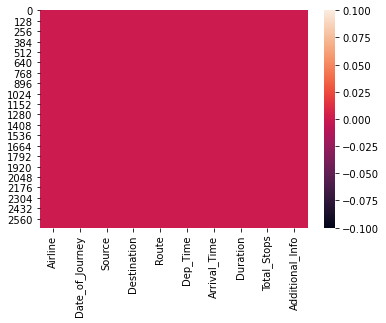

In [71]:
sns.heatmap(testset.isnull())

___From the above heatmap visualization we can observe that there are no white spaces, hence no null values.___

In [72]:
testset.nunique()

Airline             11
Date_of_Journey     44
Source               5
Destination          5
Route              100
Dep_Time           199
Arrival_Time       704
Duration           320
Total_Stops          5
Additional_Info      6
dtype: int64

We have some categorical data here, lets check their value counts :

In [73]:
testset.Airline.value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64

Here we can observe repeated values for some airlines, which are Jet Airways, Multiple carriers, and Vistara. Hence these can be replaced with one airline only.

In [74]:
testset["Airline"]=testset["Airline"].replace({'Jet Airways Business': 'Jet Airways'})
testset["Airline"]=testset["Airline"].replace({'Multiple carriers Premium economy': 'Multiple carriers'})
testset["Airline"]=testset["Airline"].replace({'Vistara Premium economy': 'Vistara'})

In [75]:
testset.Airline.value_counts()

Jet Airways          899
IndiGo               511
Air India            440
Multiple carriers    350
SpiceJet             208
Vistara              131
Air Asia              86
GoAir                 46
Name: Airline, dtype: int64

___Successfully replaced.___

In [76]:
testset.Source.value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [77]:
testset.Destination.value_counts()

Cochin       1145
Banglore      710
Delhi         555
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [78]:
testset.Additional_Info.value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Change airports                    1
Business class                     1
Name: Additional_Info, dtype: int64

# Feature Engineering :

In [79]:
testset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In the dataset we can observe columns such as __"Date_of_Journey", "Route", "Dep_Time", "Arrival_Time", "Duration"__ are not in a proper format which can be used for analysis and machine learning models.

Therefore we need to convert them into timestamps using __datetime__ library for proper analysis and prediction.

In [80]:
testset.Date_of_Journey

0        6/06/2019
1       12/05/2019
2       21/05/2019
3       21/05/2019
4       24/06/2019
           ...    
2666     6/06/2019
2667    27/03/2019
2668     6/03/2019
2669     6/03/2019
2670    15/06/2019
Name: Date_of_Journey, Length: 2671, dtype: object

From "Date_of_Journey", we will extract only the date and month. This data is specifically for the year 2019 only, so no need to extract year.

In [81]:
# To extract the day of journey

testset['Journey_Day']= pd.to_datetime(testset.Date_of_Journey, format="%d/%m/%Y").dt.day

In [82]:
# To extract the month of journey

testset['Journey_Month']= pd.to_datetime(testset.Date_of_Journey, format="%d/%m/%Y").dt.month

In [83]:
testset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


___Separate columns for day and month of journey are added to the test dataset.___

Hence, "Date_of_Journey" can be dropped.

In [84]:
testset.drop(['Date_of_Journey'],axis=1,inplace=True)
testset.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6


___Successfully dropped.___

__Now similarly, we can extract values from "Dep_Time"__

In [85]:
testset.Dep_Time

0       17:30
1       06:20
2       19:15
3       08:00
4       23:55
        ...  
2666    20:30
2667    14:20
2668    21:50
2669    04:00
2670    04:55
Name: Dep_Time, Length: 2671, dtype: object

In [86]:
# To extract the hour value

testset['Dep_Hour']= pd.to_datetime(testset.Dep_Time).dt.hour

In [87]:
# To extract the minute value

testset['Dep_Min']= pd.to_datetime(testset.Dep_Time).dt.minute

In [88]:
testset.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,23,55


__Separate columns for hour and minute of departure are added to the train dataset.__

Hence, "Dep_Time" can be dropped.

In [89]:
testset.drop(['Dep_Time'],axis=1,inplace=True)
testset.head(1)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30


___Successfully dropped.___

__Now similarly, we can extract values from "Arrival_Time"__

In [90]:
testset.Arrival_Time

0       04:25 07 Jun
1              10:20
2       19:00 22 May
3              21:00
4       02:45 25 Jun
            ...     
2666    20:25 07 Jun
2667           16:55
2668    04:25 07 Mar
2669           19:15
2670           19:15
Name: Arrival_Time, Length: 2671, dtype: object

In [91]:
# To extract the hour value

testset['Arrival_Hour']= pd.to_datetime(testset.Arrival_Time).dt.hour

In [92]:
# To extract the minute value

testset['Arrival_Min']= pd.to_datetime(testset.Arrival_Time).dt.minute

In [93]:
testset.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,24,6,23,55,2,45


___2 Separate columns for hour and minute of arrival are added to the train dataset.___

Hence, "Arrival_Time" can be dropped.

In [94]:
testset.drop(['Arrival_Time'],axis=1,inplace=True)
testset.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25


___Successfully dropped.___

__Now we have to extract values from "Duration"__

In [95]:
# First assigning Duration column values into a list :

duration=list(testset['Duration'])

In [96]:
duration = list(testset["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0])) # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) 
    # Extracts minutes from duration

In [97]:
testset["Duration_hours"] = duration_hours
testset["Duration_mins"] = duration_mins

In [98]:
testset.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45,2,50


___2 Separate columns for hour and minute of duration are added to the train dataset.___

Hence, "Duration" can be dropped.

In [99]:
testset.drop(['Duration'],axis=1,inplace=True)
testset.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55


___Successfully dropped.___

__Handling "Total_Stops" column :__

In [100]:
testset.Total_Stops.value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

Here we can observe 4 uniques values : non-stop, 1 stop, 2 stops, 3 stops, 4 stops.

We can replace these values with single digits for easy analysis, because while using label encoder to convert them, it might assign random values.

In [101]:
testset.Total_Stops.replace(['non-stop', '1 stop', '2 stops', '3 stops', '4 stops'],[0,1,2,3,4],inplace=True)

In [102]:
testset.Total_Stops.value_counts()

1    1431
0     849
2     379
3      11
4       1
Name: Total_Stops, dtype: int64

___Successfully replaced.___

# Handling Categorical Data :

We have 3 categorical features to handle :
    
    1. Airline
    2. Source
    3. Destination

__"Airline" :__

In [103]:
testset.Airline.value_counts()

Jet Airways          899
IndiGo               511
Air India            440
Multiple carriers    350
SpiceJet             208
Vistara              131
Air Asia              86
GoAir                 46
Name: Airline, dtype: int64

Here Airline is nominal data, that is, data is not in any specific order, hence we use OneHotEncoder.

In [104]:
Airline=testset['Airline']
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,SpiceJet,Vistara
0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0


___And we obtained separate columns for all the airlines.___

__"Source" :__

In [105]:
testset.Source.value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

Here Source is nominal data, that is, data is not in any specific order, hence we use OneHotEncoder.

In [106]:
Source=testset['Source']
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


___And we obtained separate columns for the source locations.___

__"Destination" :__

In [107]:
testset.Destination.value_counts()

Cochin       1145
Banglore      710
Delhi         555
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

Here Destination is nominal data, that is, data is not in any specific order, hence we use OneHotEncoder.

In [108]:
Destination=testset['Destination']
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata
0,1,0,0,0
1,0,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,1,0,0


___And we obtained separate columns for the destination locations.___

__Now lets merge all the 3 dataframes into our train dataset :__

In [109]:
testset=pd.concat([testset,Airline,Source,Destination],axis=1)
testset.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,...,SpiceJet,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1,No info,6,6,17,30,...,0,0,0,1,0,0,1,0,0,0
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1,No info,12,5,6,20,...,0,0,0,0,1,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1,In-flight meal not included,21,5,19,15,...,0,0,0,1,0,0,1,0,0,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1,No info,21,5,8,0,...,0,0,0,1,0,0,1,0,0,0
4,Air Asia,Banglore,Delhi,BLR → DEL,0,No info,24,6,23,55,...,0,0,0,0,0,0,0,1,0,0


Therefore now we can drop those 3 columns from the dataset, as we already encoded them.

'Route' feature is similar to 'Total_Stops', as the route also gives total number of stopages during the whole journey, so it can be dropped.

In [110]:
testset.drop(['Airline','Source','Destination','Route'],axis=1,inplace=True)

In [111]:
testset.head(1)

,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins,...,SpiceJet,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata
0,1,No info,6,6,17,30,4,25,10,55,...,0,0,0,1,0,0,1,0,0,0


___Successfully dropped.___

In [112]:
# Statistical information about train dataset :

trainset.describe().T

,count,mean,std,min,25%,50%,75%,max
Total_Stops,10682.0,0.824190,0.675229,0.0,0.0,1.0,1.0,4.0
Price,10682.0,9087.214567,4611.548810,1759.0,5277.0,8372.0,12373.0,79512.0
Journey_Day,10682.0,13.509081,8.479363,1.0,6.0,12.0,21.0,27.0
Journey_Month,10682.0,4.708575,1.164408,3.0,3.0,5.0,6.0,6.0
Dep_Hour,10682.0,12.491013,5.748820,0.0,8.0,11.0,18.0,23.0
Dep_Min,10682.0,24.409287,18.767801,0.0,5.0,25.0,40.0,55.0
Arrival_Hour,10682.0,13.349186,6.859317,0.0,8.0,14.0,19.0,23.0
Arrival_Min,10682.0,24.690601,16.506808,0.0,10.0,25.0,35.0,55.0
Duration_hours,10682.0,10.244898,8.494916,0.0,2.0,8.0,15.0,47.0
Duration_mins,10682.0,28.326624,16.945817,0.0,15.0,30.0,45.0,55.0


__Observations :__

1. Most of the features have mean value greater than its median, which indicates presence of skewed data.
2. Some of the features has much difference between its 75th percentile and max value, which indicates presence of outliers.
3. Minimum price of a flight ticket is Rs. 1759 and the maximum price can reach upto Rs. 79512.

In [193]:
testset.drop(['Additional_Info'],axis=1,inplace=True)

In [113]:
import matplotlib.pyplot as plt

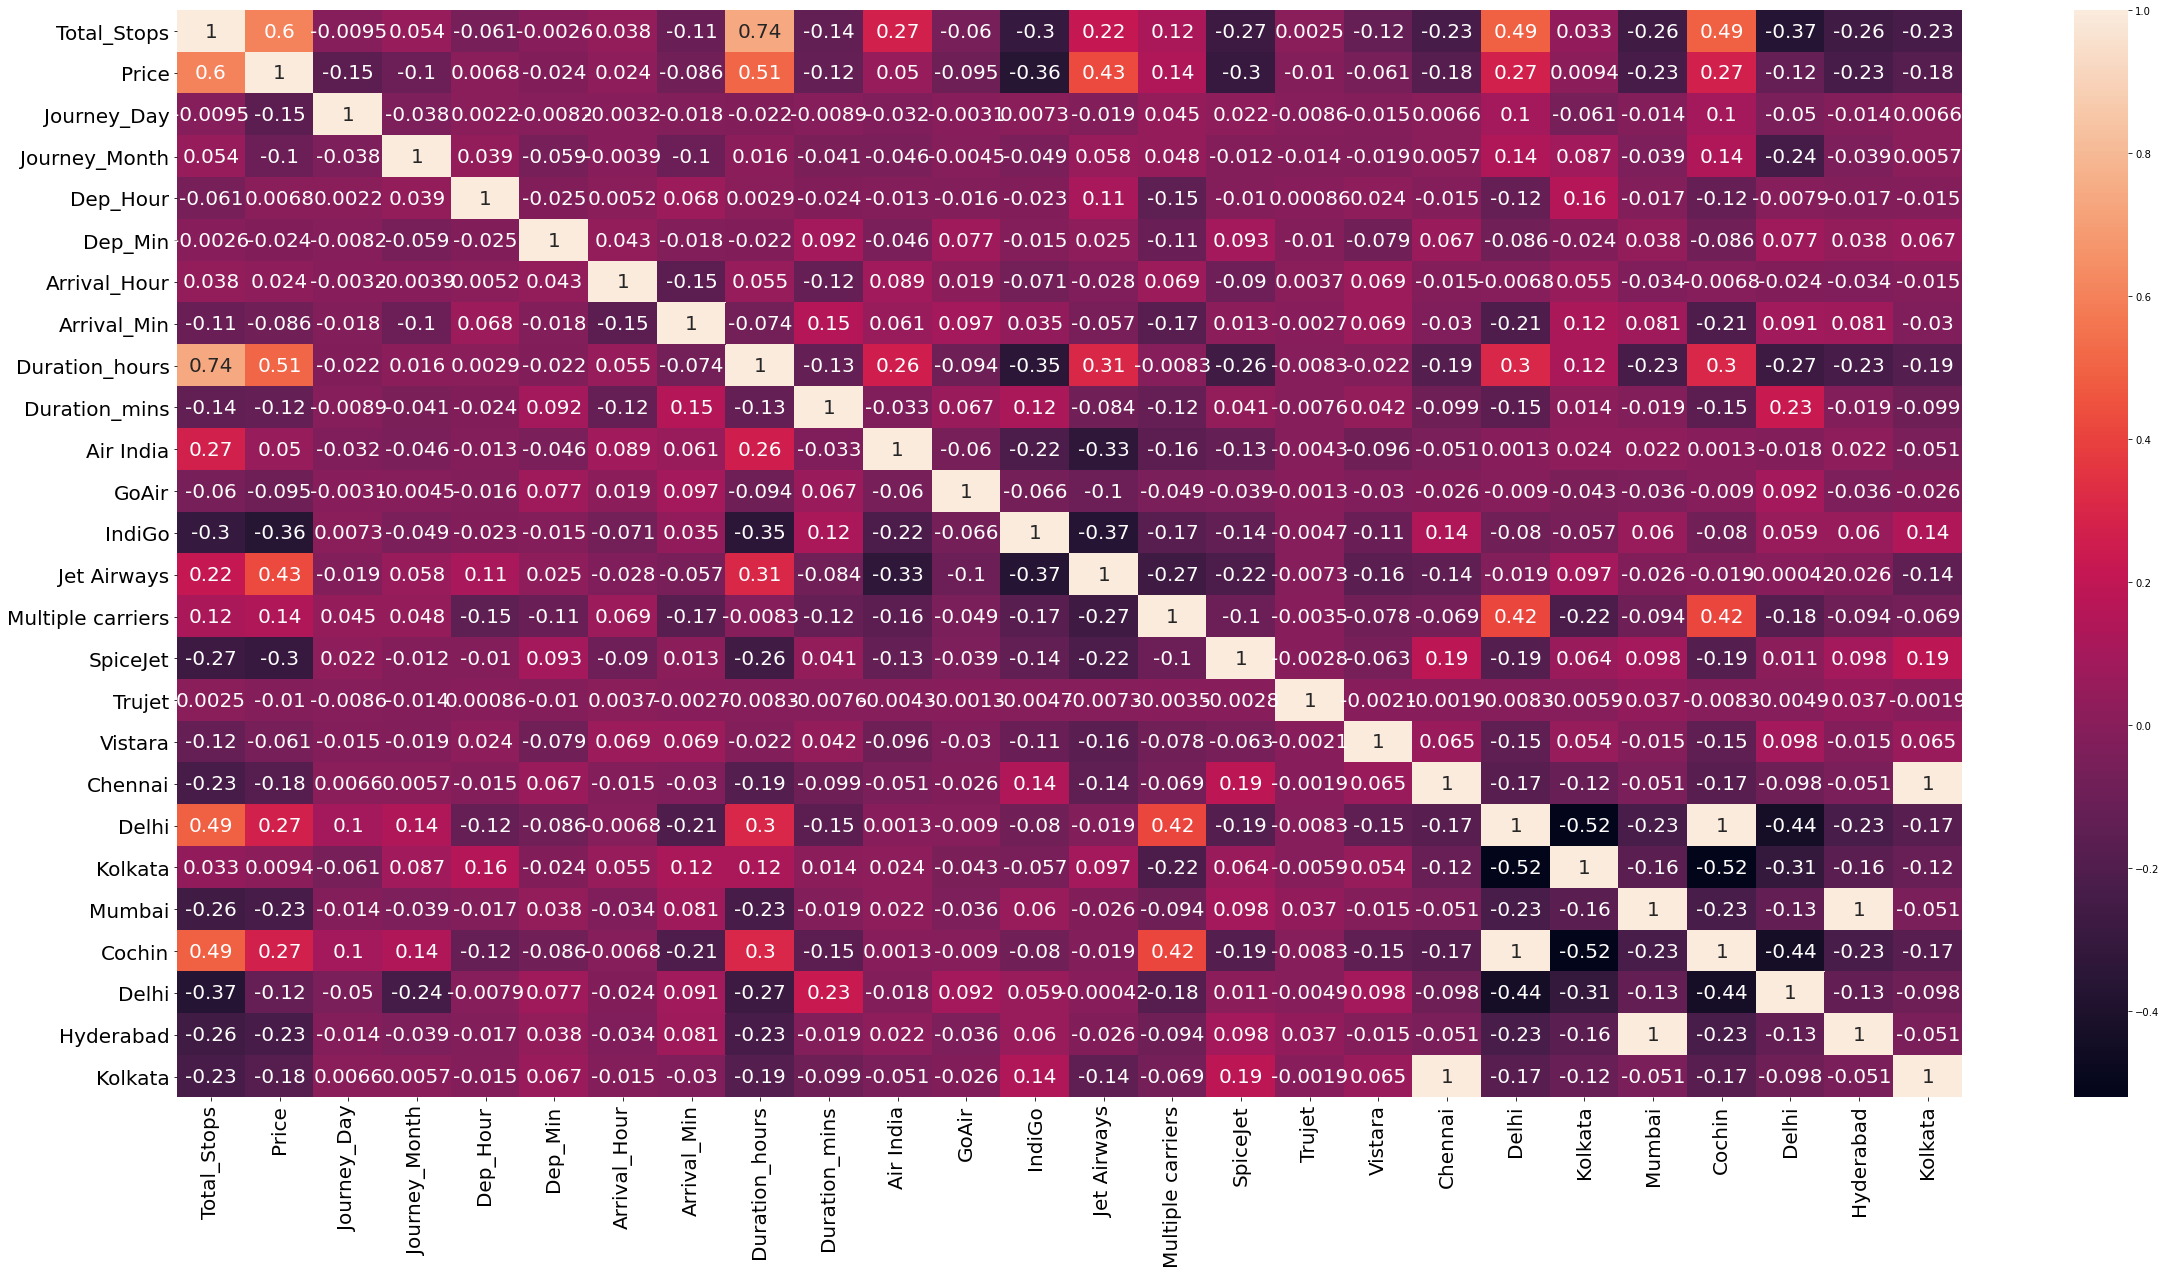

In [114]:
corr=trainset.corr()
plt.figure(figsize=(40,20))
sns.heatmap(corr, annot=True, annot_kws={'size':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# Univariate Analysis :

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

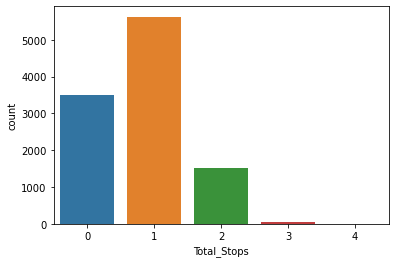

In [115]:
sns.countplot(x='Total_Stops', data=trainset)

Most passengers prefer routes with only 1 stoppage during the journey.

<AxesSubplot:xlabel='Price', ylabel='Density'>

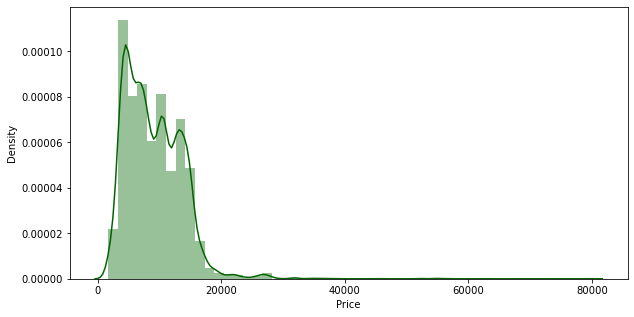

In [116]:
plt.figure(figsize=(10,5))
sns.distplot(trainset['Price'], color='darkgreen')

In [117]:
import numpy as np

In [118]:
# Price is right skewed here.

trainset['Price']=np.sqrt(trainset['Price'])

<AxesSubplot:xlabel='Price', ylabel='Density'>

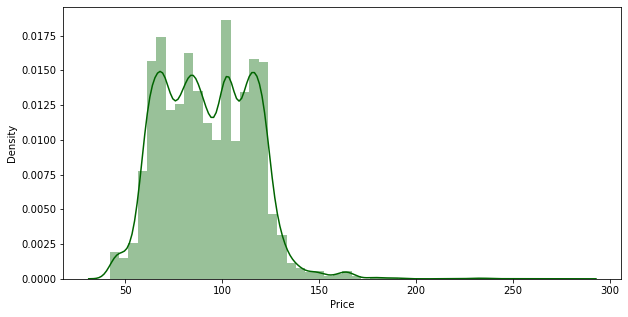

In [119]:
plt.figure(figsize=(10,5))
sns.distplot(trainset['Price'], color='darkgreen')

Skewness resolved upto some extent.

<AxesSubplot:xlabel='Journey_Day', ylabel='Density'>

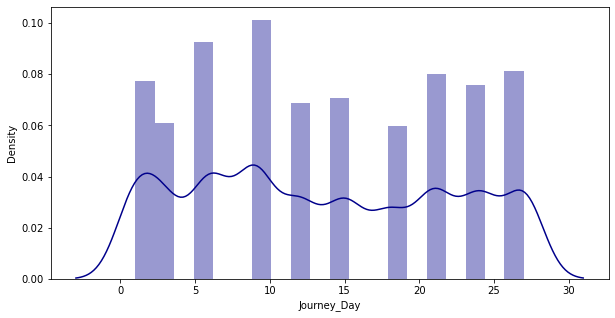

In [120]:
plt.figure(figsize=(10,5))
sns.distplot(trainset['Journey_Day'], color='darkblue')

<AxesSubplot:xlabel='Journey_Month', ylabel='Density'>

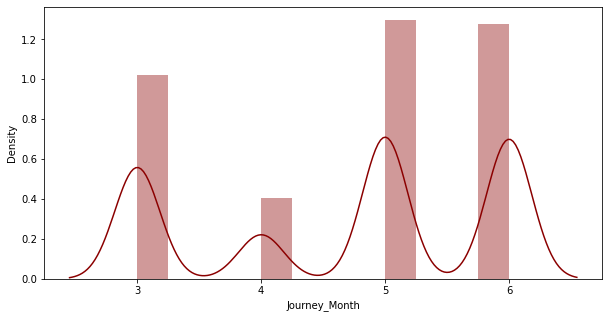

In [121]:
plt.figure(figsize=(10,5))
sns.distplot(trainset['Journey_Month'], color='darkred')

People are mostly travelling in the month of May.

<AxesSubplot:xlabel='Dep_Hour', ylabel='Density'>

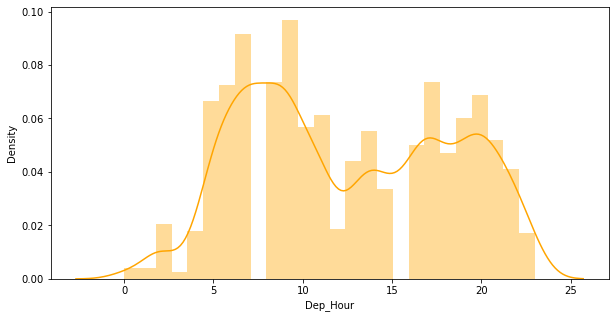

In [122]:
plt.figure(figsize=(10,5))
sns.distplot(trainset['Dep_Hour'], color='orange')

People are mostly getting tickets in the morning hours.

In [123]:
trainset.IndiGo.value_counts()

0    8629
1    2053
Name: IndiGo, dtype: int64

<AxesSubplot:xlabel='Arrival_Hour', ylabel='Density'>

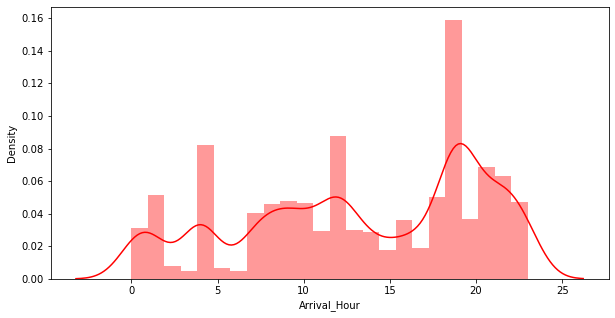

In [124]:
plt.figure(figsize=(10,5))
sns.distplot(trainset['Arrival_Hour'], color='red')

Passengers are arriving at late hours and early departures[as seen in the above graph], which indicates longer journeys.

<AxesSubplot:xlabel='Duration_hours', ylabel='Density'>

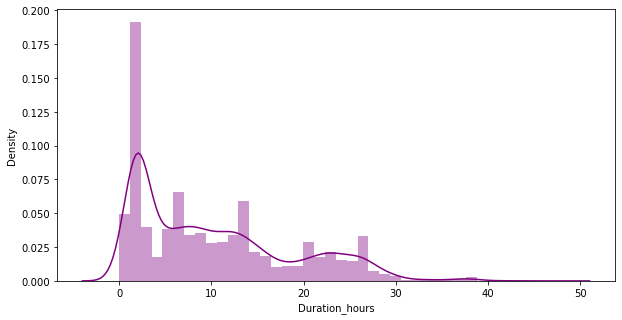

In [125]:
plt.figure(figsize=(10,5))
sns.distplot(trainset['Duration_hours'], color='purple')

Here we can observe some right skewed data.

In [126]:
trainset['Duration_hours']=np.sqrt(trainset['Duration_hours'])

<AxesSubplot:xlabel='Duration_hours', ylabel='Density'>

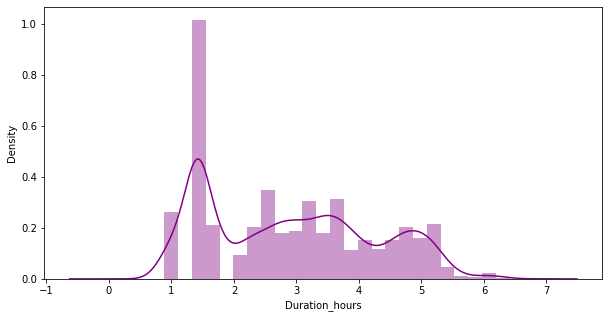

In [127]:
plt.figure(figsize=(10,5))
sns.distplot(trainset['Duration_hours'], color='purple')

Skewness balanced to some extent.

# Bivariate Analysis :

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

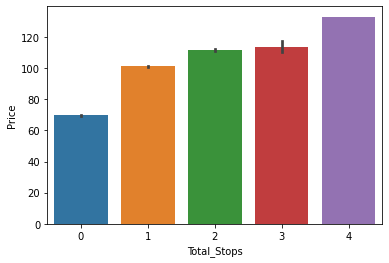

In [128]:
sns.barplot(data=trainset, x='Total_Stops',y='Price')

With the increase in layovers during the journey, price also increases. Price of tickets are lowest with non stop flights.

<AxesSubplot:xlabel='Additional_Info', ylabel='Price'>

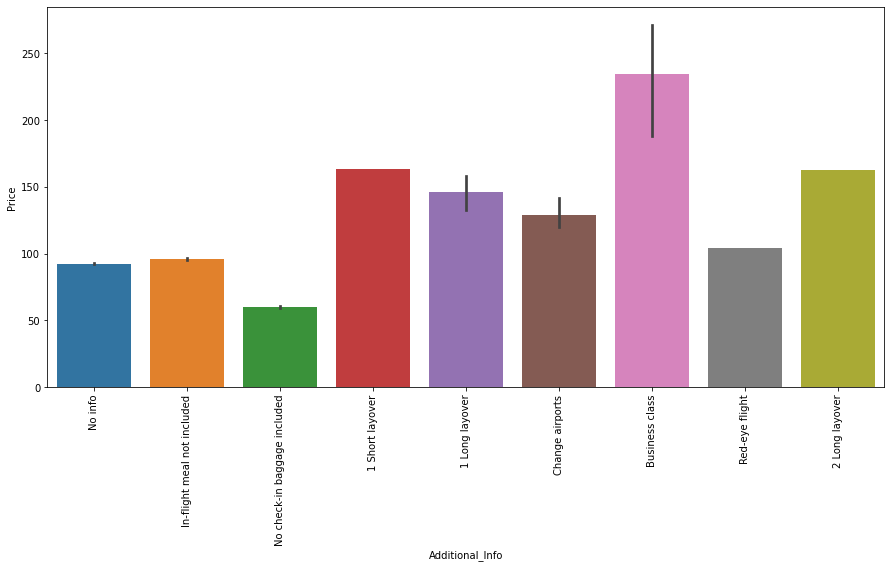

In [129]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
sns.barplot(data=trainset, x='Additional_Info',y='Price')

Business class tickets are having highest price.

<AxesSubplot:xlabel='Journey_Day', ylabel='Price'>

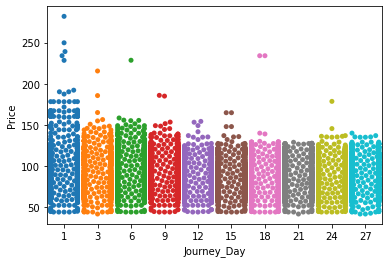

In [130]:
sns.swarmplot(data=trainset, x='Journey_Day',y='Price')

People are mostly travelling in the first week of the month and due to the spread of datapoints we can say that outliers can be present.

<AxesSubplot:xlabel='Journey_Month', ylabel='Price'>

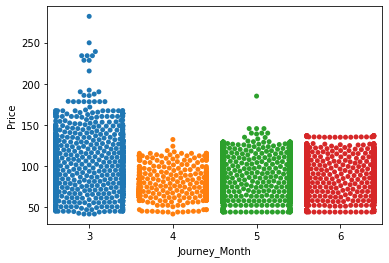

In [131]:
sns.swarmplot(data=trainset, x='Journey_Month',y='Price')

People are most travelling in the month of March.

<AxesSubplot:xlabel='Dep_Hour', ylabel='Price'>

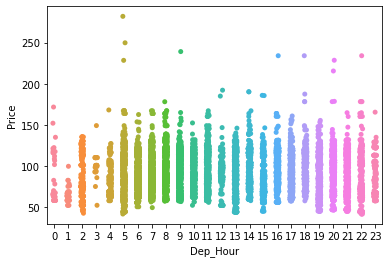

In [132]:
sns.stripplot(data=trainset, x='Dep_Hour',y='Price')

Price can be little less with early departure hours, and outliers can be observed here.

<AxesSubplot:xlabel='Arrival_Hour', ylabel='Price'>

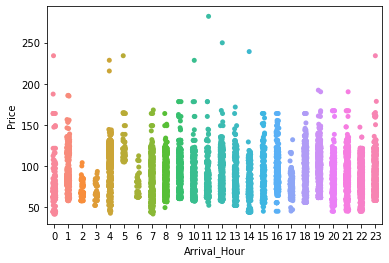

In [133]:
sns.stripplot(data=trainset, x='Arrival_Hour',y='Price')

Price of the tickets can be less for early arrival hours. And outliers can also be observed here.

<AxesSubplot:xlabel='Duration_hours', ylabel='Price'>

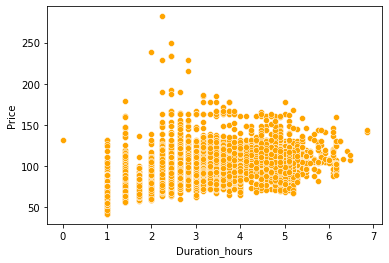

In [134]:
sns.scatterplot(data=trainset, x='Duration_hours',y='Price', color='orange')

Mostly flight journeys takes 3 to 5 hours of duration.

In [135]:
trainset.Additional_Info.value_counts()

No info                         8347
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

We can drop "Additional_Info" column because for approximately 80% we don't have any information.

In [136]:
trainset.drop(['Additional_Info'],axis=1,inplace=True)

In [137]:
trainset.head(1)

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins,...,Trujet,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata
0,0,62.425956,24,3,22,20,1,10,1.414214,50,...,0,0,0,0,0,0,0,1,0,0


___Successfully dropped.___

# Detecting Outliers :

Total_Stops             AxesSubplot(0.125,0.787927;0.168478x0.0920732)
Price                AxesSubplot(0.327174,0.787927;0.168478x0.0920732)
Journey_Day          AxesSubplot(0.529348,0.787927;0.168478x0.0920732)
Journey_Month        AxesSubplot(0.731522,0.787927;0.168478x0.0920732)
Dep_Hour                AxesSubplot(0.125,0.677439;0.168478x0.0920732)
Dep_Min              AxesSubplot(0.327174,0.677439;0.168478x0.0920732)
Arrival_Hour         AxesSubplot(0.529348,0.677439;0.168478x0.0920732)
Arrival_Min          AxesSubplot(0.731522,0.677439;0.168478x0.0920732)
Duration_hours          AxesSubplot(0.125,0.566951;0.168478x0.0920732)
Duration_mins        AxesSubplot(0.327174,0.566951;0.168478x0.0920732)
Air India            AxesSubplot(0.529348,0.566951;0.168478x0.0920732)
GoAir                AxesSubplot(0.731522,0.566951;0.168478x0.0920732)
IndiGo                  AxesSubplot(0.125,0.456463;0.168478x0.0920732)
Jet Airways          AxesSubplot(0.327174,0.456463;0.168478x0.0920732)
Multip

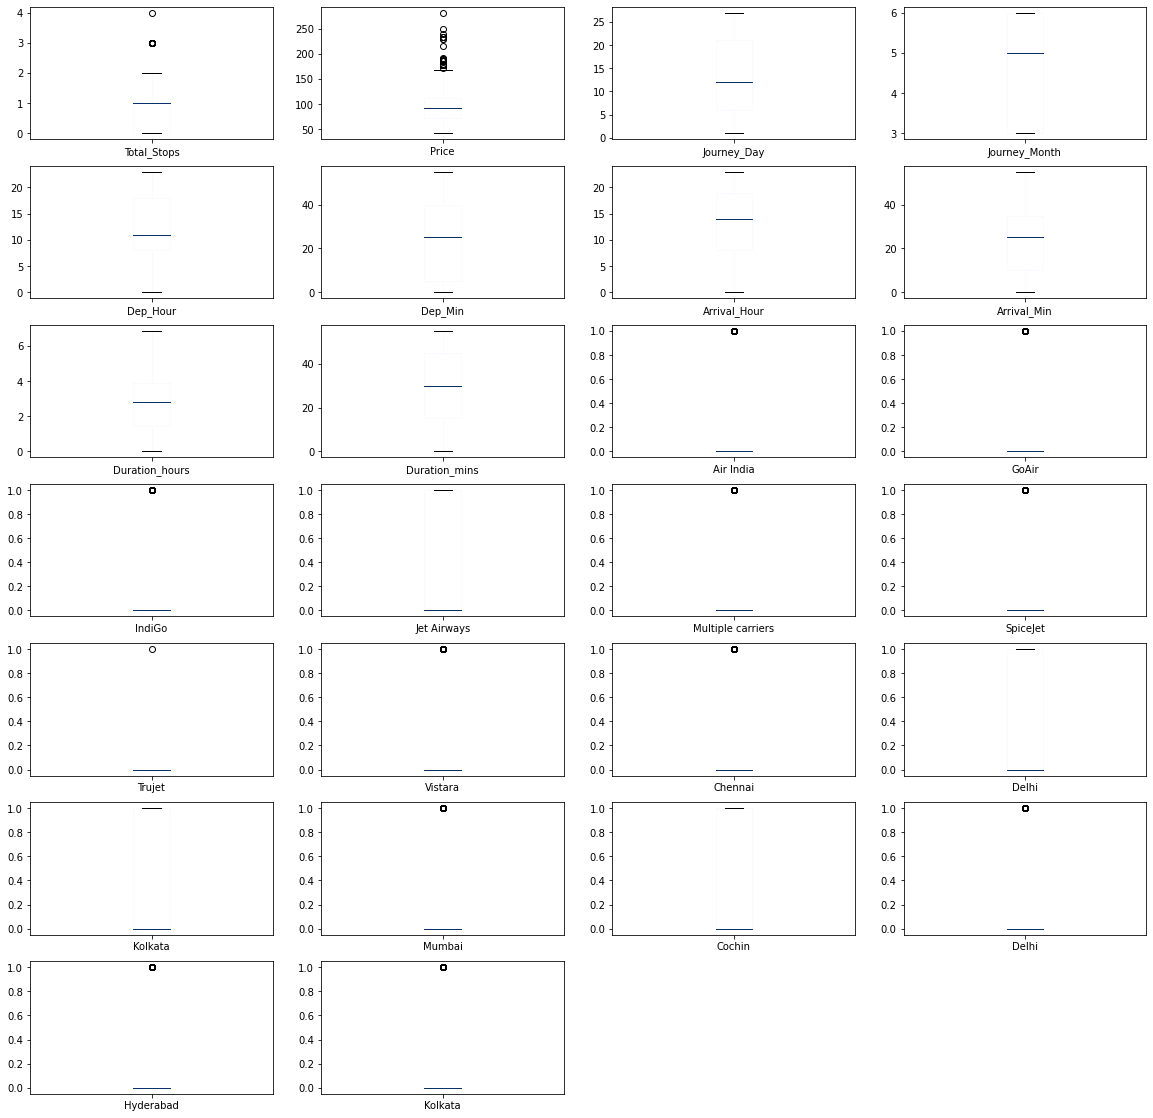

In [138]:
trainset.plot(kind='box', subplots=True, layout=(7,4), figsize=(20,20), colormap='Blues')

Through this visualizations, the outliers are clearly visible.

And we need to remove them.

In [139]:
# Importing required zscore library

from scipy.stats import zscore
import numpy as np

In [140]:
z=np.abs(zscore(trainset))

In [141]:
threshold=3

In [142]:
trainset_new=trainset[(z<3).all(axis=1)]

In [143]:
print('Shape of original dataframe', trainset.shape)

Shape of original dataframe (10682, 26)


In [144]:
print('Shape of dataframe after outliers removal', trainset_new.shape)

Shape of dataframe after outliers removal (8317, 26)


In [145]:
# Data loss percentage

loss=((10682-8317)/10682)*100
print('Data loss percentage ',loss)

Data loss percentage  22.140048680022467


Here we can see the difference between our original df shape and df_new shape, and the percentage of data loss. Much of the outliers are removed with 22% and we can't afford to lose more data and will proceed further with these values.

In [146]:
trainset=trainset_new
trainset.shape

(8317, 26)

# Variance Inflation Factor :

__<font color=orange>It helps us to eliminate multi co-linearity.</font>__

___Spliting the dataset :___

In [147]:
# Data part

x=trainset.drop(['Price'],axis=1)

In [148]:
x.head(1)

,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins,Air India,...,Trujet,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata
0,0,24,3,22,20,1,10,1.414214,50,0,...,0,0,0,0,0,0,0,1,0,0


In [149]:
# Target

y=trainset.Price

In [150]:
y.head(1)

0    62.425956
Name: Price, dtype: float64

In [151]:
# Importing required library for variance inflation factor.

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [152]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

In [153]:
vif_calc()

    VIF Factor           Features
0     2.764135        Total_Stops
1     1.023095        Journey_Day
2     1.129916      Journey_Month
3     1.086172           Dep_Hour
4     1.095014            Dep_Min
5     1.109843       Arrival_Hour
6     1.150975        Arrival_Min
7     2.692052     Duration_hours
8     1.103833      Duration_mins
9     5.617277          Air India
10         NaN              GoAir
11    5.228066             IndiGo
12    8.006458        Jet Airways
13    4.796316  Multiple carriers
14         NaN           SpiceJet
15         NaN             Trujet
16         NaN            Vistara
17         NaN            Chennai
18         inf              Delhi
19   25.486659            Kolkata
20         NaN             Mumbai
21         inf             Cochin
22   16.128106              Delhi
23         NaN          Hyderabad
24         NaN            Kolkata


# Feature Scaling :
__<font color=orange>To transform the dataset into same format, so that we have a uniform dataset.</font>__

In [154]:
# Importing required scaler library

from sklearn.preprocessing import StandardScaler

In [155]:
scale=StandardScaler()
x=pd.DataFrame(scale.fit_transform(x), columns=x.columns)
x.head(10)

,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins,Air India,...,Trujet,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata
0,-1.553647,1.234293,-1.508713,1.652782,-0.199185,-1.789366,-0.815256,-1.445286,1.236648,-0.478025,...,0.0,0.0,0.0,-1.032884,-0.627747,0.0,-1.032884,1.992814,0.0,0.0
1,1.657506,-1.495892,0.219419,-1.322129,1.405806,-0.062313,-0.515287,-0.452884,-0.170549,2.091940,...,0.0,0.0,0.0,-1.032884,1.592998,0.0,-1.032884,-0.501803,0.0,0.0
2,1.657506,-0.546263,1.083485,-0.622150,0.068314,-1.357603,0.084649,0.927612,-1.577746,-0.478025,...,0.0,0.0,0.0,0.968163,-0.627747,0.0,0.968163,-0.501803,0.0,0.0
3,0.051930,-0.190151,0.219419,0.952803,-1.001680,1.376898,0.384617,-0.783016,-0.170549,-0.478025,...,0.0,0.0,0.0,-1.032884,1.592998,0.0,-1.032884,-0.501803,0.0,0.0
4,0.051930,-1.495892,-1.508713,0.602813,1.405806,1.089055,0.684585,-0.973246,0.955209,-0.478025,...,0.0,0.0,0.0,-1.032884,-0.627747,0.0,-1.032884,1.992814,0.0,0.0
5,0.051930,-0.190151,-1.508713,0.952803,1.673305,-0.494077,0.084649,0.536050,0.110891,-0.478025,...,0.0,0.0,0.0,-1.032884,-0.627747,0.0,-1.032884,1.992814,0.0,0.0
6,0.051930,-1.495892,-1.508713,-0.797144,-1.269178,-1.213682,-1.115224,1.107856,-1.296307,-0.478025,...,0.0,0.0,0.0,-1.032884,-0.627747,0.0,-1.032884,1.992814,0.0,0.0
7,0.051930,-0.190151,-1.508713,-0.797144,1.673305,-0.494077,0.084649,1.444227,0.110891,-0.478025,...,0.0,0.0,0.0,-1.032884,-0.627747,0.0,-1.032884,1.992814,0.0,0.0
8,0.051930,1.590404,0.219419,-0.272160,0.068314,0.801213,-0.515287,-0.452884,1.236648,-0.478025,...,0.0,0.0,0.0,0.968163,-0.627747,0.0,0.968163,-0.501803,0.0,0.0
9,0.051930,-1.495892,1.083485,-0.622150,1.138308,1.376898,-1.415192,0.320546,-0.733428,2.091940,...,0.0,0.0,0.0,0.968163,-0.627747,0.0,0.968163,-0.501803,0.0,0.0


# Power Transformation :
I will use Yeo-Johnson to transform this dataset so that the resulting features looks more normally distributed. And also reduce skewness and outliers.

In [156]:
# First importing the required library for power transformation

from sklearn.preprocessing import PowerTransformer

In [157]:
power=PowerTransformer(method='yeo-johnson')
x=pd.DataFrame(power.fit_transform(x), columns=x.columns)
x.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins,Air India,...,Trujet,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata
0,-1.549268,1.212946,-1.377703,1.601794,-0.132374,-1.589022,-0.804679,-1.475645,1.263770,-0.478025,...,0.0,0.0,0.0,-1.032884,-0.627747,0.0,-1.032884,1.992814,0.0,0.0
1,1.662655,-1.562540,0.039296,-1.351609,1.354791,-0.215640,-0.477893,-0.433367,-0.211621,2.091940,...,0.0,0.0,0.0,-1.032884,1.592998,0.0,-1.032884,-0.501803,0.0,0.0
2,1.662655,-0.514580,1.204303,-0.602977,0.139743,-1.290684,0.142725,0.930745,-1.526499,-0.478025,...,0.0,0.0,0.0,0.968163,-0.627747,0.0,0.968163,-0.501803,0.0,0.0
3,0.048918,-0.141979,0.039296,0.955866,-1.014650,1.581317,0.433983,-0.775612,-0.211621,-0.478025,...,0.0,0.0,0.0,-1.032884,1.592998,0.0,-1.032884,-0.501803,0.0,0.0
4,0.048918,-1.562540,-1.377703,0.624680,1.354791,1.171548,0.715198,-0.975003,0.956715,-0.478025,...,0.0,0.0,0.0,-1.032884,-0.627747,0.0,-1.032884,1.992814,0.0,0.0


In [158]:
# Rechecking VIF

def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

In [159]:
vif_calc()

      VIF Factor           Features
0   2.789784e+00        Total_Stops
1   1.024872e+00        Journey_Day
2   1.122306e+00      Journey_Month
3   1.081529e+00           Dep_Hour
4   1.094302e+00            Dep_Min
5   1.113313e+00       Arrival_Hour
6   1.155314e+00        Arrival_Min
7   2.757468e+00     Duration_hours
8   1.106618e+00      Duration_mins
9   5.601865e+00          Air India
10           NaN              GoAir
11  5.208237e+00             IndiGo
12  7.993885e+00        Jet Airways
13  4.798290e+00  Multiple carriers
14           NaN           SpiceJet
15           NaN             Trujet
16           NaN            Vistara
17           NaN            Chennai
18  3.968276e+04              Delhi
19           inf            Kolkata
20           NaN             Mumbai
21  1.764780e+04             Cochin
22           inf              Delhi
23           NaN          Hyderabad
24           NaN            Kolkata


So after scaling and power transforamtion, VIF factors are balanced to an exceptable range.

# Machine Learning Models :
Here we have a linear case, hence we'll go with Linear Regression and various other regression models.

In [160]:
# Importing the necessary libraries :
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Finding best random state :

In [161]:
score=0
random_state=0

for i in range(1, 1000):
    x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred=lr.predict(x_test)
    r2=r2_score(y_test,pred)
    
    if r2>score:
        score=r2
        random_state=i

print("Highest r2 score is", score,"on random state", random_state)

Highest r2 score is 0.625206843036274 on random state 411


# Required Evaluation Metrices :

In [162]:
# Spliting the dataset
def reg(model, x, y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=411)
# Here 20% will be used for testing purpose and rest 80% for training purpose.
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting x_test
    pred=model.predict(x_test)
    
    # Mean square error should be low always
    mse=mean_squared_error(y_test,pred,squared=False)
    print("Mean Square Error Score is:", mse)
    
    # r2 score
    r2=r2_score(y_test,pred,multioutput='variance_weighted')*100
    print("r2 Score is:", r2)
    
    # Cross Validation Score
    cv=(cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv)
    
     
    # Difference between r2 score and cv score
    diff = r2-cv
    print("Difference between r2 Score and Cross Validation Score is", diff)

Now we can call all the models one by one using this function :

In [163]:
# Linear Regression

model=LinearRegression()
reg(model,x,y)

Mean Square Error Score is: 12.16752596021734
r2 Score is: 62.520684303627405
Cross Validation Score: 58.57819100340589
Difference between r2 Score and Cross Validation Score is 3.942493300221514


In [164]:
# Ridge Regression

model=Ridge(alpha=0.001, normalize=True)
reg(model,x,y)

Mean Square Error Score is: 12.167608708479131
r2 Score is: 62.52017452723031
Cross Validation Score: 58.587545364318615
Difference between r2 Score and Cross Validation Score is 3.932629162911695


In [165]:
# Lasso Regression

model=Lasso(alpha=0.001, normalize=True)
reg(model,x,y)

Mean Square Error Score is: 12.19018408509948
r2 Score is: 62.38096786328321
Cross Validation Score: 58.541337764127235
Difference between r2 Score and Cross Validation Score is 3.8396300991559755


In [166]:
# ElasticNet

model=ElasticNet (alpha=0.0001)
reg(model,x,y)

Mean Square Error Score is: 12.166178787084105
r2 Score is: 62.52898316934032
Cross Validation Score: 58.58829180941362
Difference between r2 Score and Cross Validation Score is 3.940691359926703


In [167]:
# Support Vector Regression (poly)

model=SVR(kernel='poly', gamma='auto')
reg(model,x,y)

Mean Square Error Score is: 12.308697580244063
r2 Score is: 61.64594447893521
Cross Validation Score: 58.74213750661493
Difference between r2 Score and Cross Validation Score is 2.9038069723202824


In [168]:
# Support Vector Regression (linear)

model=SVR(kernel='linear', gamma='auto')
reg(model,x,y)

Mean Square Error Score is: 12.338969859880477
r2 Score is: 61.45705488110769
Cross Validation Score: 57.88111550947425
Difference between r2 Score and Cross Validation Score is 3.5759393716334387


In [169]:
# Support Vector Regression (rbf)

model=SVR(kernel='rbf', gamma='auto')
reg(model,x,y)

Mean Square Error Score is: 11.276485954051669
r2 Score is: 67.80898603931242
Cross Validation Score: 64.30757387065624
Difference between r2 Score and Cross Validation Score is 3.5014121686561737


In [170]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model,x,y)

Mean Square Error Score is: 13.508364706277822
r2 Score is: 53.805247487307554
Cross Validation Score: 50.69046087508629
Difference between r2 Score and Cross Validation Score is 3.114786612221266


In [171]:
# Random Forest Regressor

model=RandomForestRegressor(n_estimators=10,random_state=40)
reg(model,x,y)

Mean Square Error Score is: 9.388900382828533
r2 Score is: 77.6839897510531
Cross Validation Score: 77.68795626542023
Difference between r2 Score and Cross Validation Score is -0.003966514367121476


In [172]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2)
reg(model,x,y)

Mean Square Error Score is: 9.388900382828533
r2 Score is: 77.6839897510531
Cross Validation Score: 77.68795626542023
Difference between r2 Score and Cross Validation Score is -0.003966514367121476


In [173]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(n_estimators=120)
reg(model,x,y)

Mean Square Error Score is: 9.502365020026955
r2 Score is: 77.14135366931738
Cross Validation Score: 75.88921044862127
Difference between r2 Score and Cross Validation Score is 1.2521432206961123


In [174]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=100,learning_rate=1.0,random_state=40)
reg(model,x,y)

Mean Square Error Score is: 12.07740240477353
r2 Score is: 63.073838627804804
Cross Validation Score: 62.608242133578294
Difference between r2 Score and Cross Validation Score is 0.46559649422651006


In [175]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=300)
reg(model,x,y)

Mean Square Error Score is: 9.968627007827171
r2 Score is: 74.84306180525057
Cross Validation Score: 73.70579778153962
Difference between r2 Score and Cross Validation Score is 1.137264023710955


_After finding all the scores of various models, we found that Random Forest Regressor model gives the highest r2 score, and less difference between r2 score and cross validation score. Hence we choose this model and proceed further with the process._

# Hyper Parameter Tuning :
Applying hyper parameter tuning using Grid Search CV method, to find the best parameters of Random Forest Regressor Model

In [ ]:
RandomForestRegressor(n_estimators=[100]
    criterion={"squared_error", "absolute_error", "poisson"},
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features={"auto", "sqrt", "log2"},
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,
)

These are the various parameters for RandomForestRegressor, which i found by clicking shift+tab buttons inside the function.

First we have to create a dictionary of these parameters so that it can be passsed to the grid search function.

In [181]:
params={'n_estimators':[100],
    'criterion':["squared_error", "absolute_error","poisson"],
    'max_features':["auto", "sqrt", "log2"]}

In [182]:
from sklearn.model_selection import GridSearchCV

In [183]:
grid=GridSearchCV(RandomForestRegressor(), params, cv=5)

In [184]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100]})

In [185]:
grid.best_params_

{'criterion': 'absolute_error', 'max_features': 'auto', 'n_estimators': 100}

_So here we have found the best parameters for our model, and now we can finally train our model._

In [187]:
RFR=RandomForestRegressor(criterion='absolute_error', max_features='auto', n_estimators=100)

In [188]:
RFR.fit(x_train,y_train)
pred=RFR.predict(x_test)
r2=r2_score(y_test, pred)*100
print('r2 score for the final model : ',r2)

r2 score for the final model :  78.1208896003314


# Saving the best model :

In [189]:
import pickle
filename='Flight_Price.pkl'
pickle.dump(RFR,open(filename,'wb'))

# Prediction with Test Dataset :

In [199]:
Trujet=trainset['Trujet']

In [201]:
testset=pd.concat([testset,Trujet],axis=1)

In [205]:
x=testset

In [208]:
testset.dropna(inplace=True)

In [212]:
testset['Trujet'].replace(np.NaN, testset['Trujet'].mean, inplace=True)

In [214]:
scale=StandardScaler()
x=pd.DataFrame(scale.fit_transform(x), columns=x.columns)
x.head(10)

,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins,Air India,...,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,Trujet
0,0.247853,-0.837333,1.094745,0.773265,0.267704,-1.361709,0.026340,-0.022537,1.588723,-0.444096,...,-0.227101,-0.169972,1.154448,-0.601714,-0.273586,1.154448,-0.512140,-0.273586,-0.169972,0.0
1,0.247853,-0.110877,0.240505,-1.161445,-0.256324,-0.509324,-0.271771,-0.737750,-1.695935,-0.444096,...,-0.227101,-0.169972,-0.866215,1.661918,-0.273586,-0.866215,-0.512140,-0.273586,-0.169972,0.0
2,0.247853,0.978807,0.240505,1.125030,-0.518338,0.769252,-1.464213,1.527090,0.991512,-0.444096,...,-0.227101,-0.169972,1.154448,-0.601714,-0.273586,1.154448,-0.512140,-0.273586,-0.169972,0.0
3,0.247853,0.978807,0.240505,-0.809679,-1.304381,1.053380,-1.464213,0.335069,-1.695935,-0.444096,...,-0.227101,-0.169972,1.154448,-0.601714,-0.273586,1.154448,-0.512140,-0.273586,-0.169972,0.0
4,-1.239823,1.342035,1.094745,1.828561,1.577774,-1.645837,1.218783,-0.976154,1.290118,-0.444096,...,-0.227101,-0.169972,-0.866215,-0.601714,-0.273586,-0.866215,1.952591,-0.273586,-0.169972,0.0
5,0.247853,-0.110877,1.094745,0.949147,-0.518338,-0.225196,0.622561,0.931080,-0.501514,-0.444096,...,-0.227101,-0.169972,1.154448,-0.601714,-0.273586,1.154448,-0.512140,-0.273586,-0.169972,NaN
6,0.247853,-0.110877,-1.467975,-0.985562,0.267704,1.195444,0.622561,0.573473,-1.397329,2.251767,...,-0.227101,-0.169972,-0.866215,-0.601714,-0.273586,-0.866215,1.952591,-0.273586,-0.169972,0.0
7,0.247853,-1.442712,0.240505,0.421499,-0.518338,0.911316,0.324451,-0.618548,-0.800119,-0.444096,...,-0.227101,-0.169972,-0.866215,1.661918,-0.273586,-0.866215,-0.512140,-0.273586,-0.169972,0.0
8,-1.239823,0.252351,-1.467975,-0.457914,-0.780352,-0.225196,1.815004,-0.976154,0.991512,-0.444096,...,-0.227101,-0.169972,-0.866215,1.661918,-0.273586,-0.866215,-0.512140,-0.273586,-0.169972,0.0
9,0.247853,0.615579,0.240505,0.597382,0.267704,1.195444,0.622561,-0.499346,-1.397329,-0.444096,...,-0.227101,-0.169972,-0.866215,1.661918,-0.273586,-0.866215,-0.512140,-0.273586,-0.169972,0.0


In [216]:
power=PowerTransformer(method='yeo-johnson')
x=pd.DataFrame(power.fit_transform(x), columns=x.columns)
x.head(10)

,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins,Air India,...,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,Trujet
0,0.293665,-0.822961,1.232248,0.791669,0.324134,-1.266972,0.067521,0.315053,1.645222,-0.444096,...,-0.227101,-0.169972,1.154448,-0.601714,-0.273586,1.154448,-0.512140,-0.273586,-0.169972,0.0
1,0.293665,-0.021214,0.027596,-1.183691,-0.200098,-0.669381,-0.234742,-0.716708,-1.639221,-0.444096,...,-0.227101,-0.169972,-0.866215,1.661918,-0.273586,-0.866215,-0.512140,-0.273586,-0.169972,0.0
2,0.293665,0.986115,0.027596,1.113513,-0.477158,0.728083,-1.514160,1.354336,0.995253,-0.444096,...,-0.227101,-0.169972,1.154448,-0.601714,-0.273586,1.154448,-0.512140,-0.273586,-0.169972,0.0
3,0.293665,0.986115,0.027596,-0.797209,-1.354108,1.155838,-1.514160,0.644480,-1.639221,-0.444096,...,-0.227101,-0.169972,1.154448,-0.601714,-0.273586,1.154448,-0.512140,-0.273586,-0.169972,0.0
4,-1.279507,1.287699,1.232248,1.737129,1.506139,-1.438687,1.201242,-1.186125,1.318077,-0.444096,...,-0.227101,-0.169972,-0.866215,-0.601714,-0.273586,-0.866215,1.952591,-0.273586,-0.169972,0.0
5,0.293665,-0.021214,1.232248,0.953563,-0.477158,-0.429038,0.646372,1.048470,-0.527782,-0.444096,...,-0.227101,-0.169972,1.154448,-0.601714,-0.273586,1.154448,-0.512140,-0.273586,-0.169972,NaN
6,0.293665,-0.021214,-1.322170,-0.989273,0.324134,1.384567,0.646372,0.822243,-1.367090,2.251767,...,-0.227101,-0.169972,-0.866215,-0.601714,-0.273586,-0.866215,1.952591,-0.273586,-0.169972,0.0
7,0.293665,-1.558796,0.027596,0.461112,-0.477158,0.936929,0.360642,-0.505855,-0.812013,-0.444096,...,-0.227101,-0.169972,-0.866215,1.661918,-0.273586,-0.866215,-0.512140,-0.273586,-0.169972,0.0
8,-1.279507,0.337178,-1.322170,-0.420967,-0.762485,-0.429038,1.739429,-1.186125,0.995253,-0.444096,...,-0.227101,-0.169972,-0.866215,1.661918,-0.273586,-0.866215,-0.512140,-0.273586,-0.169972,0.0
9,0.293665,0.670643,0.027596,0.627611,0.324134,1.384567,0.646372,-0.310776,-1.367090,-0.444096,...,-0.227101,-0.169972,-0.866215,1.661918,-0.273586,-0.866215,-0.512140,-0.273586,-0.169972,0.0


In [217]:
price_prediction=RFR.predict(testset)

In [218]:
price_prediction

array([113.49990852,  93.3879875 , 114.97724075, ..., 113.49990852,
       109.55825176, 109.18641342])

In [219]:
Prediction = pd.DataFrame()
Prediction['Price']= price_prediction
Prediction

,Price
0,113.499909
1,93.387987
2,114.977241
3,99.328009
4,83.751923
...,...
2089,110.059068
2090,93.387987
2091,113.499909
2092,109.558252


__<font color="orange">THANK YOU.</font>__